# Use Kaggle Cli to download the data

In [ ]:
pip install kaggle

In [ ]:
# upload your kaggle.json file to the notebook to download the data
mkdir -p /root/.config/kaggle

In [ ]:
mv /content/kaggle.json /root/.config/kaggle

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!/bin/bash
!kaggle datasets download vuppalaadithyasairam/spine-fracture-prediction-from-xrays -p /content/drive/MyDrive/honors

Dataset URL: https://www.kaggle.com/datasets/vuppalaadithyasairam/spine-fracture-prediction-from-xrays
License(s): unknown
 98% 291M/296M [00:07<00:00, 29.3MB/s]
100% 296M/296M [00:07<00:00, 42.5MB/s]


In [ ]:
!unzip /content/drive/MyDrive/honors/spine-fracture-prediction-from-xrays.zip -d /content/drive/MyDrive/honors

# using keras ImageDataGenerator, we will load the images into a generator


In [2]:
# imports
import keras
from keras.models import *
from keras.layers import *
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [3]:
# Create our train and val generators that we can apply in order to make our dataset
# This makes life a lot easier than defining our own dataset class (which is technically a better idea but I digress)
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    rotation_range=20,
)

val_datagen = ImageDataGenerator(
    rescale = 1./255
)

train_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/honors/cervical fracture/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    "/content/drive/MyDrive/honors/cervical fracture/val",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 3800 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


# We will utilize a CNN to do this

In [40]:
scratch_model = Sequential()
scratch_model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
scratch_model.add(MaxPooling2D(pool_size=(2, 2)))
scratch_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
scratch_model.add(MaxPooling2D(pool_size=(2, 2)))
scratch_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
scratch_model.add(MaxPooling2D(pool_size=(2, 2)))
scratch_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
scratch_model.add(MaxPooling2D(pool_size=(2, 2)))
scratch_model.add(Flatten())
scratch_model.add(Dense(128, activation='relu'))
scratch_model.add(Dropout(0.5))
scratch_model.add(Dense(1, activation='sigmoid'))

In [42]:
scratch_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

scratch_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,456,993 (9.37 MB)

 Trainable params: 2,456,993 (9.37 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
history = scratch_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5)

Epoch 1/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 74s 561ms/step - accuracy: 0.5652 - loss: 0.6851 - val_accuracy: 0.7475 - val_loss: 0.6585
Epoch 2/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 61s 489ms/step - accuracy: 0.7560 - loss: 0.6313 - val_accuracy: 0.9750 - val_loss: 0.5704
Epoch 3/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 62s 492ms/step - accuracy: 0.8305 - loss: 0.5266 - val_accuracy: 0.8775 - val_loss: 0.4423
Epoch 4/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 84s 506ms/step - accuracy: 0.8540 - loss: 0.4149 - val_accuracy: 0.9750 - val_loss: 0.3083
Epoch 5/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 62s 493ms/step - accuracy: 0.8660 - loss: 0.3422 - val_accuracy: 0.9625 - val_loss: 0.2623


# visualiziation of from_scratch approach

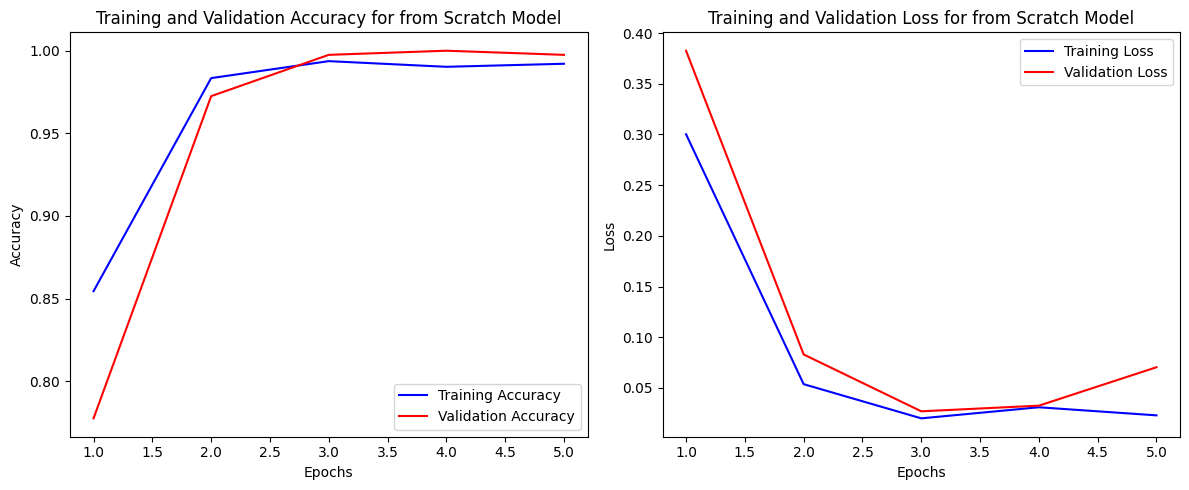

In [38]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy for from Scratch Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss for from Scratch Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [26]:
from tensorflow.keras.applications import ResNet50
import tensorflow as tf

base = tf.keras.applications.ResNet50V2(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

In [27]:
base.trainable = True

In [28]:
model = base.output
model = Flatten()(model)
model = Dense(128, activation= 'relu')(model)
model = Dropout(0.5)(model)
model = Dense(1, activation='sigmoid')(model)

In [29]:
from tensorflow.keras.models import Model
model = Model(inputs=base.input, outputs=model)

In [30]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [44]:
model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 56, 56, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 56, 56, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 58, 58, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv  

 Total params: 77,135,293 (294.25 MB)

 Trainable params: 25,696,617 (98.02 MB)

 Non-trainable params: 45,440 (177.50 KB)

 Optimizer params: 51,393,236 (196.05 MB)

In [32]:
history2 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5)

Epoch 1/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6916 - loss: 0.6903

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


119/119 ━━━━━━━━━━━━━━━━━━━━ 850s 7s/step - accuracy: 0.6926 - loss: 0.6903 - val_accuracy: 0.5700 - val_loss: 0.6822
Epoch 2/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 84s 579ms/step - accuracy: 0.9608 - loss: 0.6668 - val_accuracy: 0.9825 - val_loss: 0.6582
Epoch 3/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 73s 587ms/step - accuracy: 0.9766 - loss: 0.6482 - val_accuracy: 1.0000 - val_loss: 0.6490
Epoch 4/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 82s 585ms/step - accuracy: 0.9876 - loss: 0.6384 - val_accuracy: 1.0000 - val_loss: 0.6408
Epoch 5/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 82s 570ms/step - accuracy: 0.9952 - loss: 0.6306 - val_accuracy: 1.0000 - val_loss: 0.6336


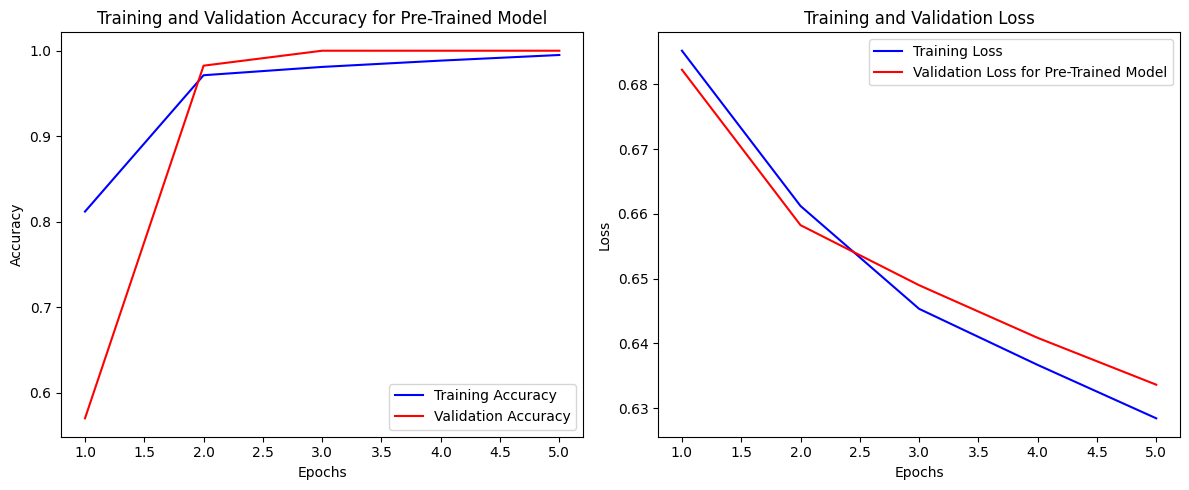

In [39]:
import matplotlib.pyplot as plt

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy for Pre-Trained Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss for Pre-Trained Model')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Visualization of fine-tuning approach